<a href="https://colab.research.google.com/github/WeimusT/Quantitative_trading/blob/main/Kelly_Formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import yfinance as yf
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
spy_ticker = yf.Ticker("SPY") # S&P 500 ETF
oih_ticker = yf.Ticker("OIH") # Oil service ETF
iat_ticker = yf.Ticker("IAT") # Regional bank ETF
xrt_ticker = yf.Ticker("XRT") # Retail ETF

In [11]:
spy_raw_df = spy_ticker.history(period="3Y")
oih_raw_df = oih_ticker.history(period="3Y")
iat_raw_df = iat_ticker.history(period="3Y")
xrt_raw_df = xrt_ticker.history(period="3Y")

df = pd.merge(spy_raw_df["Close"], oih_raw_df["Close"], left_index=True, right_index=True, suffixes=["_SPY", "_OIH"])
df = pd.merge(df, iat_raw_df["Close"], left_index=True, right_index=True).rename({"Close": "Close_IAT"}, axis=1)
df = pd.merge(df, xrt_raw_df["Close"], left_index=True, right_index=True).rename({"Close": "Close_XRT"}, axis=1)
df

,Close_SPY,Close_OIH,Close_IAT,Close_XRT
Date,,,,
2020-05-11 00:00:00-04:00,279.410248,104.699234,28.763063,36.175346
2020-05-12 00:00:00-04:00,273.841156,105.241554,27.436815,35.241924
2020-05-13 00:00:00-04:00,268.998047,96.254333,26.027672,34.327534
2020-05-14 00:00:00-04:00,272.217163,97.745750,26.884211,34.498985
2020-05-15 00:00:00-04:00,273.468597,98.036285,26.571066,35.194302
...,...,...,...,...
2023-05-04 00:00:00-04:00,405.130005,254.580002,29.750000,59.419998
2023-05-05 00:00:00-04:00,412.630005,261.579987,31.580000,61.169998
2023-05-08 00:00:00-04:00,412.739990,262.100006,31.230000,61.529999


In [13]:
trainset = np.arange(0, 252*2)
testset = np.arange(252*2, df.shape[0])
print("Train set: %i, %i" % (min(trainset), max(trainset)))
print("Test set: %i, %i" % (min(testset), max(testset)))

Train set: 0, 503
Test set: 504, 755


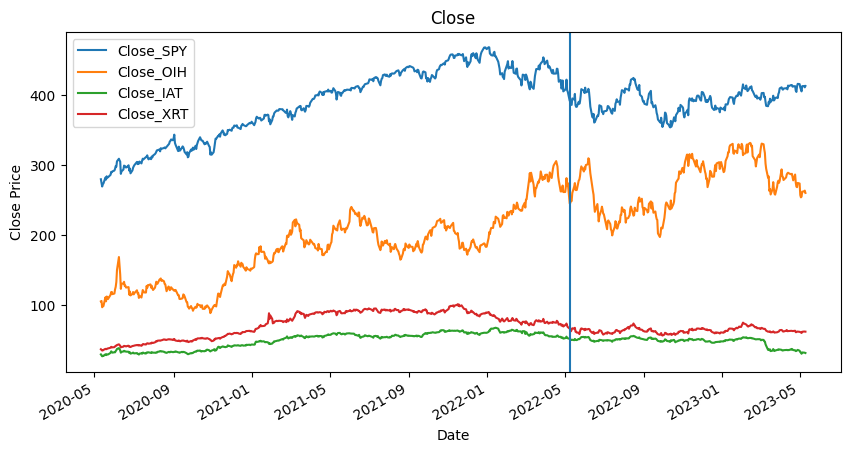

In [14]:
ax = df.plot(figsize=[10, 5], title="Close")
ax.set_ylabel("Close Price")
ax.axvline(df.iloc[trainset].index[-1])

In [25]:
# Buy and hold strategy - train
dailyret = df.pct_change()
excessret = dailyret - 0.04 / 252 # assuming 4% risk free rate
bnhmean = np.mean(dailyret.iloc[trainset])
bnhstd = np.std(dailyret.iloc[trainset])
bnhsharpe = np.sqrt(252) * bnhmean  / bnhstd
print("Annualized Sharpe (Train)")
print(bnhsharpe)

Annualized Sharpe (Train)
Close_SPY    1.063755
Close_OIH    1.063299
Close_IAT    0.986668
Close_XRT    1.079740
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
M = 252 *excessret.mean()
M

Close_SPY    0.108281
Close_OIH    0.391386
Close_IAT    0.046043
Close_XRT    0.191330
dtype: float64

In [27]:
C = 252 * excessret.cov()
C

,Close_SPY,Close_OIH,Close_IAT,Close_XRT
Close_SPY,0.035842,0.043665,0.042287,0.041738
Close_OIH,0.043665,0.257452,0.111242,0.066268
Close_IAT,0.042287,0.111242,0.126253,0.063207
Close_XRT,0.041738,0.066268,0.063207,0.110318


In [31]:
F = np.dot(inv(C), M)
F

array([ 2.54682952,  2.01829417, -2.86833521,  1.20180654])

In [21]:
# Buy and hold strategy - test
dailyret = df.pct_change()
excessret = dailyret - 0.04 / 252 # assuming 4% risk free rate
bnhmean = np.mean(dailyret.iloc[testset])
bnhstd = np.std(dailyret.iloc[testset])
bnhsharpe = np.sqrt(252) * bnhmean  / bnhstd
print("Annualized Sharpe (Test)")
print(bnhsharpe)

Annualized Sharpe (Test)
Close_SPY    0.352282
Close_OIH    0.359792
Close_IAT   -1.245391
Close_XRT   -0.020583
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
